## Simulación Monte Carlo

Queremos en el proyecto, buscar la forma de unir activos con una probabilidad de que saquemos 

In [190]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [207]:
import yfinance as yf
from datetime import datetime
import pandas as pd

goog = yf.Ticker('ETH-USD')
data = goog.history(start="2022-01-01", end="2023-11-25", interval="1d")
#Nos tremos las acciones en un año.

#We have a dataset called data

# #Elijamos las fechas que queremos analizar
# start=datetime(2019,1,1)
# end=datetime(2020,1,1)


# data_fechas=pd.DataFrame(data(start = start, end = end))

data.index = pd.to_datetime(data.index)

data=pd.DataFrame(data)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,3683.047119,3769.917969,3682.286621,3769.697021,9776191466,0.0,0.0
2022-01-02 00:00:00+00:00,3769.298340,3836.161865,3727.357422,3829.564941,9881471548,0.0,0.0
2022-01-03 00:00:00+00:00,3829.535645,3836.198730,3698.047607,3761.380371,12080777893,0.0,0.0
2022-01-04 00:00:00+00:00,3761.361572,3876.785156,3723.349854,3794.056641,14030925983,0.0,0.0
2022-01-05 00:00:00+00:00,3794.269043,3842.059814,3456.745361,3550.386963,18061338502,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-20 00:00:00+00:00,2011.853394,2066.409912,1996.044312,2022.239136,12866464824,0.0,0.0
2023-11-21 00:00:00+00:00,2022.217285,2035.035889,1937.066772,1937.066772,13653500841,0.0,0.0
2023-11-22 00:00:00+00:00,1933.583130,2089.514160,1933.162964,2064.425293,13372200584,0.0,0.0


In [208]:
precio_activo=data['Close']
volumen_activo=data['Volume']


## Análisis descriptivos de las variables

- Primer queremos saber las descripciones generalesde los datos, para poder entender una mejor infomación de ellos.


count     693.000000
mean     1873.317809
std       586.715426
min       993.636780
25%      1552.556519
50%      1742.528687
75%      1939.347046
max      3829.564941
Name: Close, dtype: float64


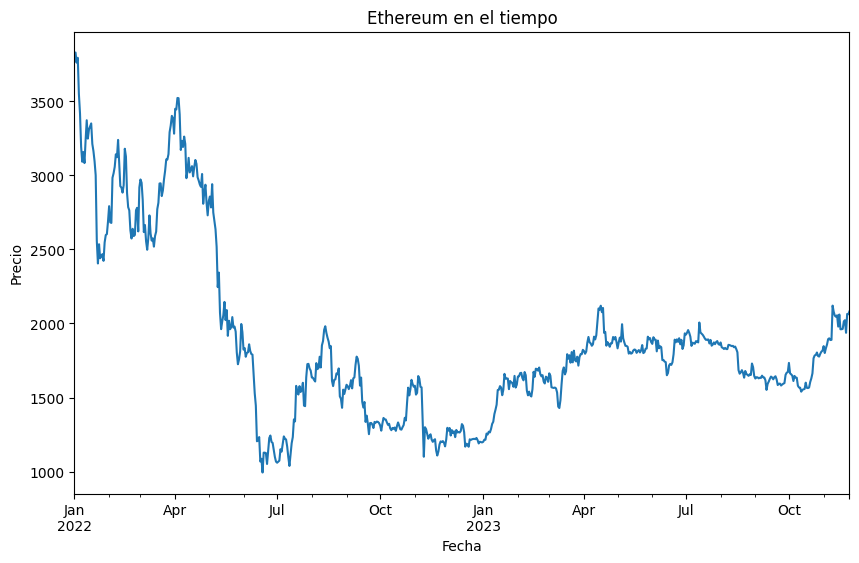

In [210]:
print(precio_activo.describe())

#Grafica activo en el tiempo
precio_activo.plot(figsize=(10,6));
plt.ylabel("Precio")
plt.xlabel("Fecha")
plt.title("Ethereum en el tiempo")
plt.show()


Aqui vemos una desviación estandar bastante grande en los datos, esto nos indica la volatilidad de ethereum en el tiempo, le media fue 1873 dolares sin embargo vemos valores minimos de 993 a 3829

- Tomando los datos de el 2022

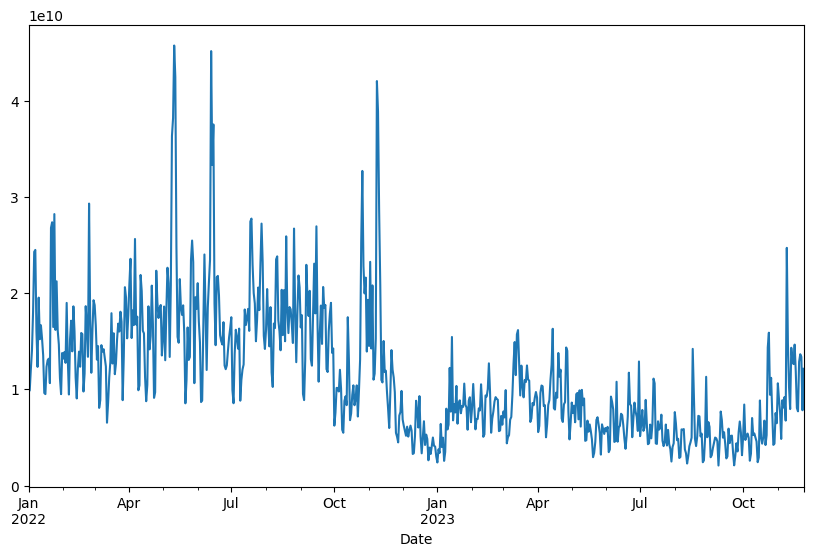

In [211]:
volumen_activo.plot(figsize=(10,6));


- Quisieramos depronto ver alguna correlación entre las variables, para esto vamos a ver la matriz de correlaciones.

In [222]:
#plot the correlation matrix
corr = data.corr()
print(corr)

                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.997330  0.995375  0.992634  0.242374        NaN   
High          0.997330  1.000000  0.994902  0.996377  0.267684        NaN   
Low           0.995375  0.994902  1.000000  0.996951  0.192144        NaN   
Close         0.992634  0.996377  0.996951  1.000000  0.225333        NaN   
Volume        0.242374  0.267684  0.192144  0.225333  1.000000        NaN   
Dividends          NaN       NaN       NaN       NaN       NaN        NaN   
Stock Splits       NaN       NaN       NaN       NaN       NaN        NaN   
Daily Return -0.097659 -0.044691 -0.030924  0.017447 -0.120551        NaN   

              Stock Splits  Daily Return  
Open                   NaN     -0.097659  
High                   NaN     -0.044691  
Low                    NaN     -0.030924  
Close                  NaN      0.017447  
Volume                 NaN     -0.120551  
Dividends              NaN           NaN  
Stock

El Volumen está un poco correlacionado con el volumen y el precio del activo para tenerlo en cuenta en otro modelo.

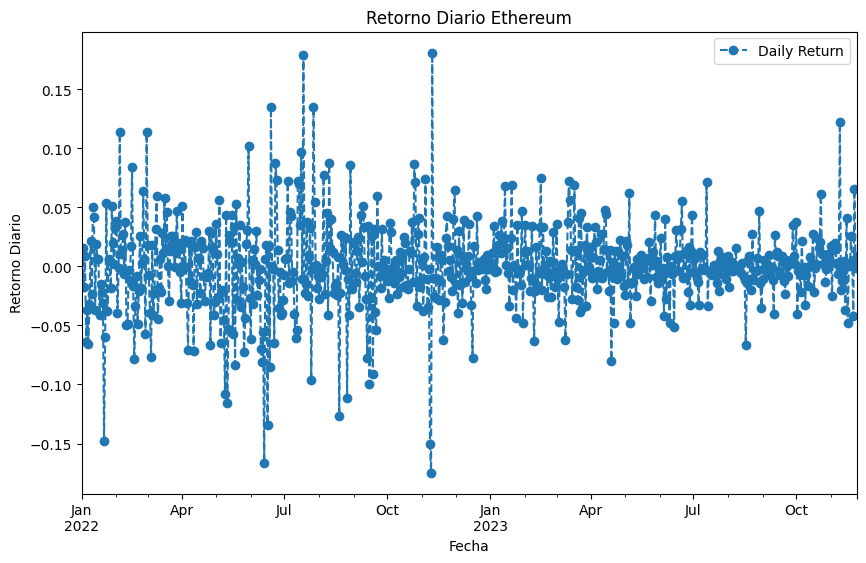

In [215]:
data['Daily Return'] = data['Close'].pct_change()

data['Daily Return'].plot(figsize=(10,6), legend=True, linestyle='--', marker='o')
plt.ylabel("Retorno Diario")
plt.xlabel("Fecha")
plt.title("Retorno Diario Ethereum")
plt.show()


<Figure size 1000x500 with 0 Axes>

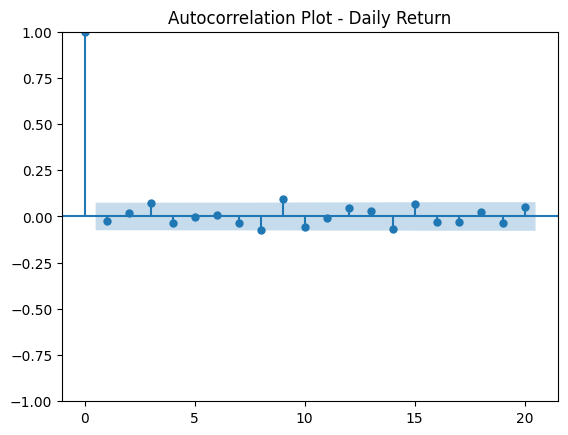

In [221]:
daily_return = data['Daily Return'].dropna()  # Drop any NaN values, if present

plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(daily_return, lags=20, title='Autocorrelation Plot - Daily Return')
plt.show()

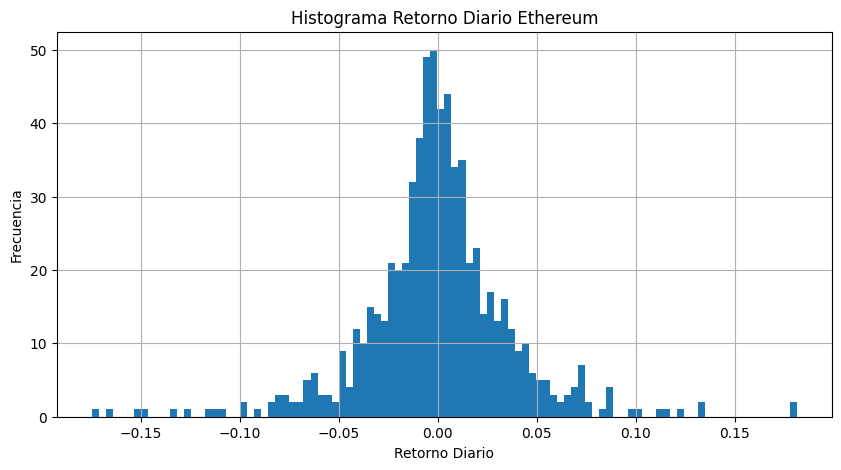

In [223]:
#Plot the daily return histogram
daily_return.hist(bins=100, figsize=(10, 5))
plt.ylabel("Frecuencia")
plt.xlabel("Retorno Diario")
plt.title("Histograma Retorno Diario Ethereum")
plt.show()


## Ahora queremos ver a qué distribución se parece

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 199.825] [loc=-0.000 scale=0.037]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1250.52] [loc=-0.175 scale=0.174]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 1250.52] [loc=-33554432.175 scale=33554432.000]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 11.9422] [loc=-0.000 scale=0.024]
[distfit] >INFO> [t         ] [0.09 sec] [RSS: 31.3509] [loc=-0.000 scale=0.022]
[distfit] >INFO> [genextreme] [0.12 sec] [RSS: 292.457] [loc=-0.015 scale=0.040]
[distfit] >INFO> [gamma     ] [0.07 sec] [RSS: 202.43] [loc=-1.387 scale=0.001]
[distfit] >INFO> [lognorm   ] [0.13 sec] [RSS: 199.225] [loc=-8.013 scale=8.012]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 199.853] [loc=-28.812 scale=35.098]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 1069.71] [loc=-0.175 scale=0.356]
[distfit] >INFO> [loggamma  ] [0.07 sec] [RSS: 200.146] [loc=-8.861 scale=1.256]


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ndweibull(c=0.948186, loc=-0.000286295, scale=0.0242657)'}, xlabel='Values', ylabel='Frequency'>)

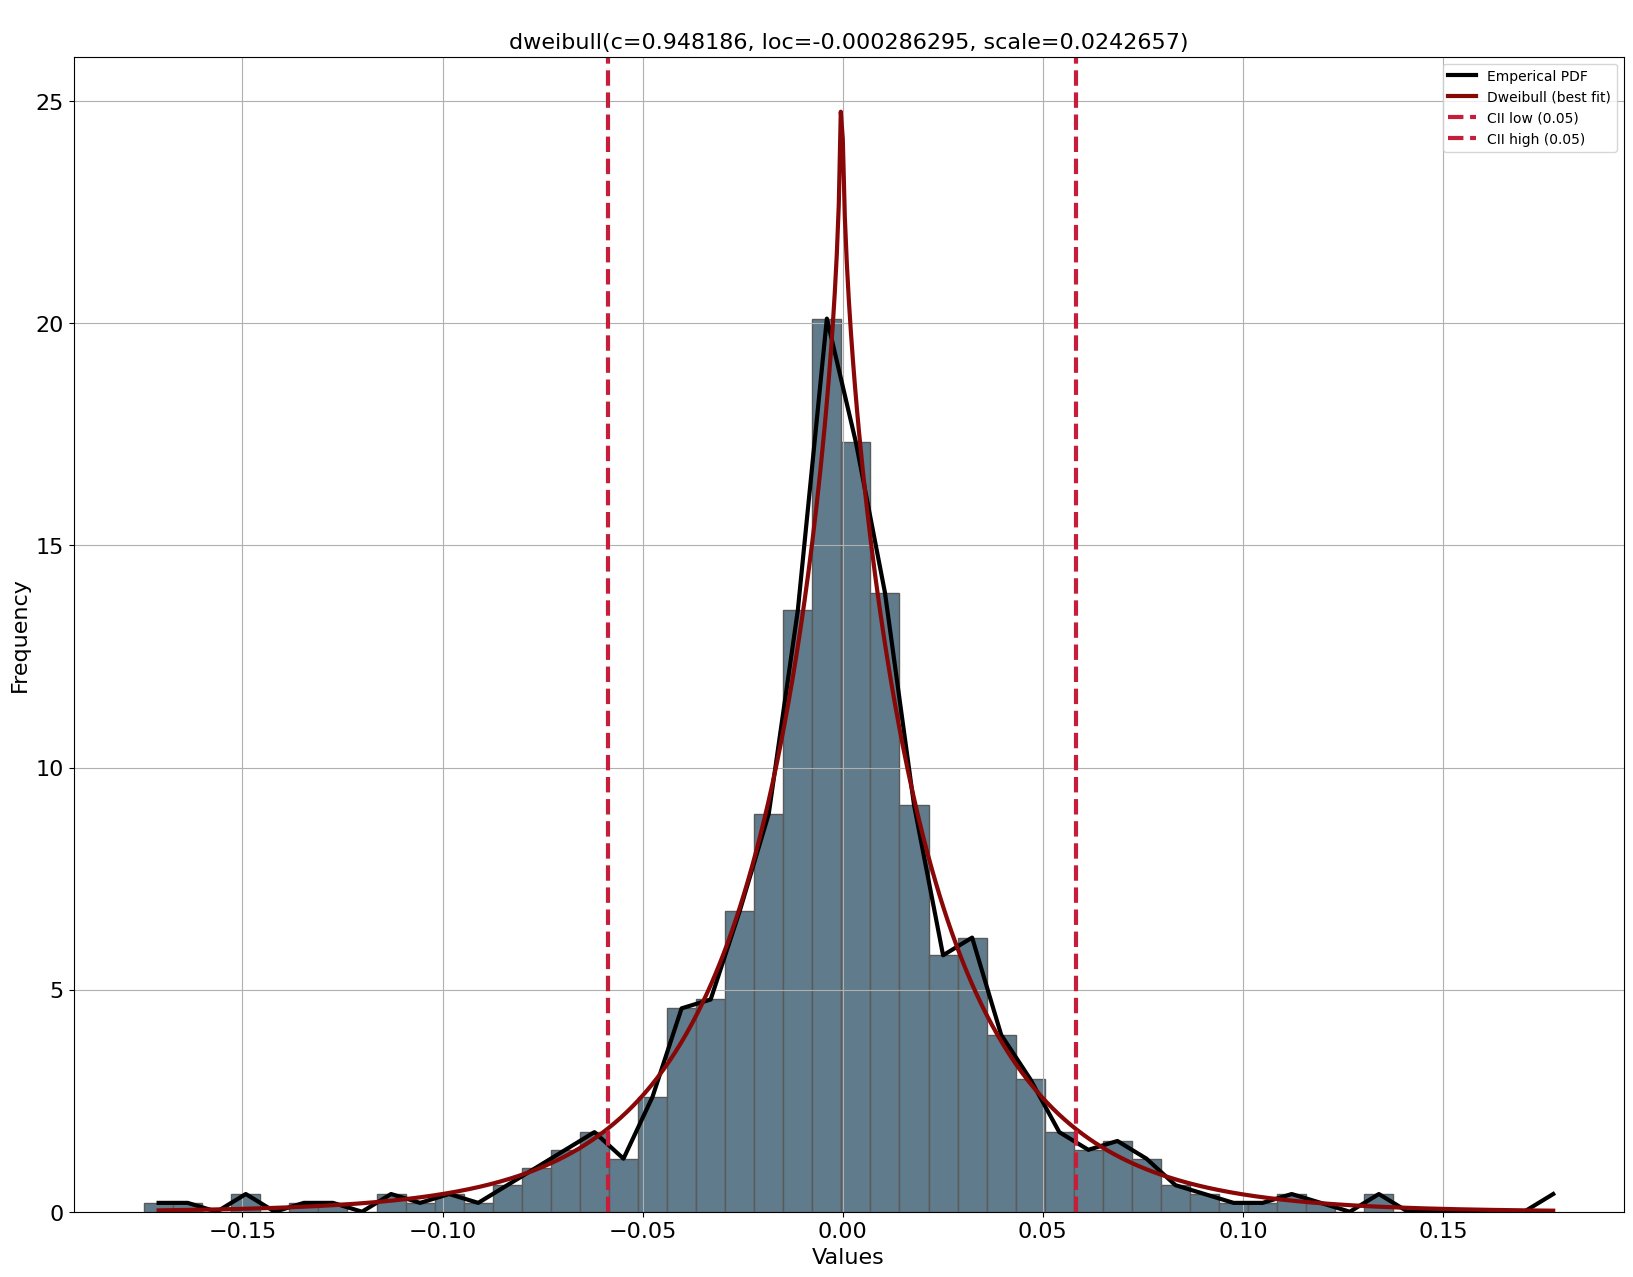

In [224]:
from distfit import distfit
dfit = distfit(todf=True)
dfit.fit_transform(daily_return)
dfit.plot()

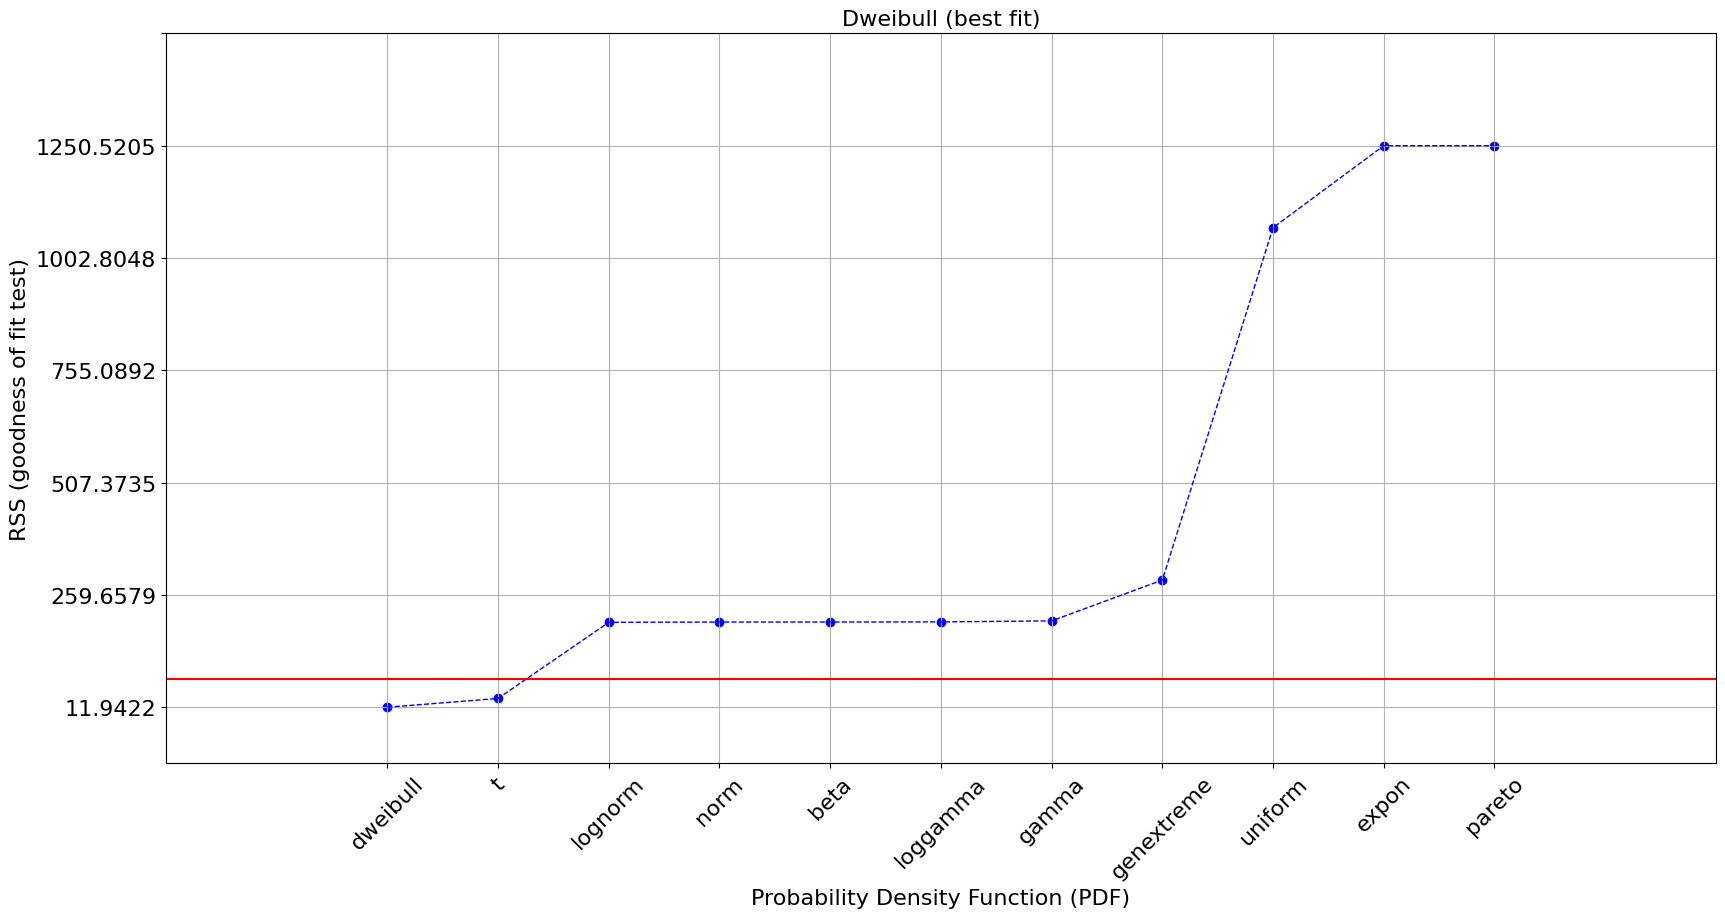

In [225]:
dfit.plot_summary()
plt.axhline(y = 0.05, color = 'r', linestyle = '-')
plt.show()

## Now lests use the brownian simulatin for this Weibell

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dweibull

def stock_monte_carlo(start_price, days, mu, sigma, weibull_params=None):
    """
    Perform Monte Carlo simulation for stock prices using a Weibull distribution.

    Parameters:
    - start_price: Initial stock price
    - days: Number of days for the simulation
    - mu: Daily drift (average return)
    - sigma: Daily volatility (standard deviation of returns)
    - weibull_params: Parameters for the Weibull distribution (c, loc, scale)

    Returns:
    - price: Array containing simulated stock prices over the specified number of days
    """

    price = np.zeros(days)
    price[0] = start_price

    dt = 1  # Assuming daily time steps

    drift = np.zeros(days)
    shock = np.zeros(days)

    c, loc, scale = weibull_params

    for i in range(1, days):
        drift[i] = mu * dt
        shock[i] = dweibull.rvs(c, loc=loc, scale=scale)
        price[i] = price[i - 1] + (price[i - 1] * (drift[i] + shock[i]))

    return price



start_price = 100  # Replace with your desired start price
days = 20  # Replace with the number of days for the simulation
drift = 0.001  # Replace with your desired daily drift
sigma = 0.02  # Replace with your desired daily volatility



weibull_params = (0.948186, -0.000286295, 0.0242657)  # Replace with your Weibull distribution parameters

drift=np.mean(daily_return)
print(drift)
sigma=np.std(daily_return)
print(sigma)


simulated_prices = stock_monte_carlo(start_price, days, drift, sigma, weibull_params)

simulated_prices

#Ahora queremos simular esto muchas veces para ver la varianza 



-0.00017271819723011961
0.03690291570306975


array([100.        ,  92.70864246,  87.79733173,  82.65595577,
        81.94180498,  82.58426595,  83.43404651,  82.53752279,
        82.29887688,  79.44973316,  79.63915439,  79.51010159,
        75.5340893 ,  75.44827059,  68.72647914,  67.8262716 ,
        62.85188825,  61.54350174,  61.77964201,  61.56534633])

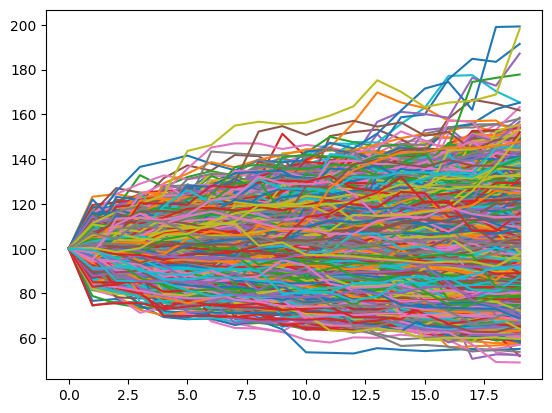

In [270]:
num_simulations = 10000
simulation_dfs = []

for _ in range(num_simulations):
    simulation_prices = stock_monte_carlo(start_price, days, drift, sigma, weibull_params)
    plt.plot(simulation_prices)
        
    # Append the DataFrame to the list
    simulation_dfs.append(simulation_prices)

# Concatenate all DataFrames into a single DataFrame


In [271]:
simulation_df = pd.DataFrame(simulation_dfs)
simulation_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,100.0,99.954628,99.882378,99.893812,99.824798,99.876289,99.886557,99.810122,99.797661,99.734033,99.659847,99.562384,99.451804,99.464540,99.408393,99.396369,99.370426,99.327838,99.246257,99.197309
std,0.0,3.612277,5.026088,6.111663,7.093326,8.016145,8.775542,9.522004,10.148698,10.797460,11.298745,11.820758,12.352226,12.912892,13.410463,13.839074,14.387211,14.833488,15.318712,15.790888
min,100.0,74.508451,75.505583,71.382092,69.449241,68.504517,67.529325,64.592646,64.326604,62.748267,53.718533,53.469281,53.187132,55.559004,54.819753,54.255292,54.838846,50.787269,49.352267,49.166929
25%,100.0,98.309544,97.126182,96.172992,95.497277,94.715548,94.181460,93.607577,93.093912,92.556277,92.124544,91.707559,91.095345,90.746443,90.265672,89.869731,89.417859,89.134952,88.745330,88.210971
50%,100.0,99.978957,99.896425,99.883619,99.730999,99.701246,99.597404,99.454364,99.407820,99.258927,99.263198,99.032441,98.811052,98.814362,98.709153,98.578960,98.478114,98.344240,98.188911,98.057048
75%,100.0,101.608649,102.618249,103.420341,104.052006,104.807428,105.259064,105.716554,106.113016,106.536407,106.772755,107.030028,107.242748,107.515837,107.731372,108.231441,108.349205,108.603873,108.897593,109.167592
max,100.0,123.226363,127.041076,136.553786,138.906345,143.663367,146.278654,154.992363,156.714150,155.639607,156.298916,159.459453,163.609203,175.246394,170.082167,171.520275,177.192224,184.837317,199.057066,199.274954


In [261]:
monte_carlo_simulations = pd.concat(simulation_dfs, axis='rows')
monte_carlo_simulations

,Day,Simulation_10000
0,1,100.000000
1,2,98.494742
2,3,97.777648
3,4,103.983592
4,5,107.964007
...,...,...
15,16,131.100032
16,17,131.422491
17,18,130.336641
18,19,130.537187


In [258]:
df_simulations.describe()

,Day,Simulation_1,Day,Simulation_2,Day,Simulation_3,Day,Simulation_4,Day,Simulation_5,...,Day,Simulation_9996,Day,Simulation_9997,Day,Simulation_9998,Day,Simulation_9999,Day,Simulation_10000
count,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000,...,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000,20.00000,20.000000
mean,10.50000,90.830722,10.50000,101.053237,10.50000,97.773784,10.50000,97.317438,10.50000,104.424190,...,10.50000,104.882704,10.50000,89.068704,10.50000,94.692480,10.50000,117.292522,10.50000,118.363898
std,5.91608,4.115729,5.91608,6.195985,5.91608,4.681804,5.91608,3.015965,5.91608,5.552965,...,5.91608,4.687731,5.91608,4.626105,5.91608,3.438551,5.91608,12.011853,5.91608,12.220814
min,1.00000,83.791084,1.00000,84.336487,1.00000,87.905575,1.00000,91.329398,1.00000,92.017283,...,1.00000,99.541336,1.00000,84.143964,1.00000,90.236358,1.00000,100.000000,1.00000,97.777648
25%,5.75000,88.277516,5.75000,99.621832,5.75000,95.286185,5.75000,95.614602,5.75000,103.152295,...,5.75000,102.164335,5.75000,85.903451,5.75000,91.722798,5.75000,106.289551,5.75000,111.240166
50%,10.50000,89.866706,10.50000,102.043404,10.50000,99.115003,10.50000,97.533363,10.50000,106.829367,...,10.50000,104.224565,10.50000,86.722647,10.50000,94.555374,10.50000,115.491773,10.50000,118.197563
75%,15.25000,93.489119,15.25000,105.241272,15.25000,100.261157,15.25000,99.650014,15.25000,107.881533,...,15.25000,106.963104,15.25000,93.367326,15.25000,96.640140,15.25000,127.523514,15.25000,130.611024
max,20.00000,100.000000,20.00000,108.320961,20.00000,104.771025,20.00000,102.013654,20.00000,110.297660,...,20.00000,116.339677,20.00000,100.000000,20.00000,102.215385,20.00000,135.943910,20.00000,134.068507


## Heston Model Simulation


Ahora para hacer la simulación hacemos una discretización del módelo. 

$d S_{i+1}=S_i e^{\left(r-\frac{v_i}{2}\right) \Delta t+\sqrt{v_i} \Delta t W_{S, i+1}^Q}$

$v_{i+1}=v_i+\kappa\left(\theta-v_t\right) \Delta t+\sigma \sqrt{v_i} \Delta t W_{v, i+1}^{\mathbb{Q}}$




In [101]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Assuming you have a DataFrame named 'df' with columns 'Close', 'High', and 'Low'
# You need to define a function that calculates model prices given parameters

def model_prices(parameters, initial_price, observed_prices, time_steps, dt):
    kappa, theta, sigma = parameters
    prices = np.zeros_like(observed_prices)
    volatility = np.zeros_like(observed_prices)

    prices[0] = initial_price
    volatility[0] = 0.5  # Initial volatility, you may adjust this

    for i in range(1, len(prices)):
        dW_s = np.random.normal(0, np.sqrt(dt))
        dW_v = np.random.normal(0, np.sqrt(dt))

        prices[i] = prices[i - 1] * np.exp((r - 0.5 * volatility[i - 1]) * dt + np.sqrt(volatility[i - 1]) * np.sqrt(dt) * dW_s)
        volatility[i] = volatility[i - 1] + kappa * (theta - volatility[i - 1]) * dt + sigma * np.sqrt(volatility[i - 1]) * np.sqrt(dt) * dW_v

    model_prices = prices  # Modify this if needed based on your model

    return np.sum((model_prices - observed_prices)**2)  # Objective function (sum of squared differences)

# Load your financial data into a DataFrame (assuming it's named 'df')
# You may need to preprocess the data, calculate returns, etc.

# Extract relevant columns
observed_prices = data['Close'].values
initial_price = observed_prices[0]  # Initial stock price
time_steps = len(observed_prices)
dt = 1 / time_steps  # Assuming uniform time steps

# Set initial parameters
initial_params = [0.1, 0.1, 0.1]  # Initial guess for parameters

# Perform optimization
result = minimize(model_prices, initial_params, args=(initial_price, observed_prices, time_steps, dt), method='L-BFGS-B')
estimated_params = result.x

result


  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: nan
        x: [ 1.000e-01  1.000e-01  1.000e-01]
      nit: 3
      jac: [-5.777e+11  1.714e+12 -4.131e+11]
     nfev: 180
     njev: 45
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [109]:
# Parameters
# simulation dependent
S0 = 100.0             # asset price
T = 1.0                # time in years
r = 0.02               # risk-free rate
N = 252                # number of time steps in simulation
M = 1000               # number of simulations

# Heston dependent parameters
kappa = 3              # rate of mean reversion of variance under risk-neutral dynamics
theta = 0.20**2        # long-term mean of variance under risk-neutral dynamics
v0 = 0.25**2           # initial variance under risk-neutral dynamics
rho = 0.7              # correlation between returns and variances under risk-neutral dynamics
sigma = 0.6            # volatility of volatility

theta, v0

(0.04000000000000001, 0.0625)

## Monte Carlo Simulation

In [111]:


def heston_model_sim(S0, v0, rho, kappa, theta, sigma,T, N, M):
    """
    Inputs:
     - S0, v0: initial parameters for asset and variance
     - rho   : correlation between asset returns and variance
     - kappa : rate of mean reversion in variance process
     - theta : long-term mean of variance process
     - sigma : vol of vol / volatility of variance process
     - T     : time of simulation
     - N     : number of time steps
     - M     : number of scenarios / simulations

    Outputs:
    - asset prices over time (numpy array)
    - variance over time (numpy array)
    """
    # initialise other parameters
    dt = T/N
    mu = np.array([0,0])
    cov = np.array([[1,rho],
                    [rho,1]])

    # arrays for storing prices and variances
    S = np.full(shape=(N+1,M), fill_value=S0)
    v = np.full(shape=(N+1,M), fill_value=v0)

    # sampling correlated brownian motions under risk-neutral measure
    Z = np.random.multivariate_normal(mu, cov, (N,M))

    for i in range(1,N+1):
        S[i] = S[i-1] * np.exp( (r - 0.5*v[i-1])*dt + np.sqrt(v[i-1] * dt) * Z[i-1,:,0] )
        v[i] = np.maximum(v[i-1] + kappa*(theta-v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt)*Z[i-1,:,1],0)

    return S, v



In [161]:
from scipy.optimize import minimize

# Set initial parameters
S0 = 100.0
v0 = 0.25**2
r = 0.02
T = 1.0
N = 252
M = 1000
# implementation of MC
def MCHeston(St, K, r, T, 
              sigma, kappa, theta, volvol, rho, 
              iterations, timeStepsPerYear):
    timeStepsPerYear = 12
    iterations = 1000000
    timesteps = T * timeStepsPerYear
    dt = 1/timeStepsPerYear    # Define the containers to hold values of St and Vt
    S_t = np.zeros((timesteps, iterations))
    V_t = np.zeros((timesteps, iterations))    # Assign first value of all Vt to sigma
    V_t[0,:] = sigma
    S_t[0, :] = St    # Use Cholesky decomposition to
    means = [0,0]
    stdevs = [1/3, 1/3]
    covs = [[stdevs[0]**2          , stdevs[0]*stdevs[1]*rho], 
            [stdevs[0]*stdevs[1]*rho,           stdevs[1]**2]]    
    Z = np.random.multivariate_normal(means, covs, (iterations, timesteps)).T
    Z1 = Z[0]
    Z2 = Z[1]    
    for i in range(1, timesteps):

        # Use Z2 to calculate Vt
        V_t[i,:] = np.maximum(V_t[i-1,:] + kappa * (theta - V_t[i-1,:])* dt + volvol *  np.sqrt(V_t[i-1,:] * dt) * Z2[i,:],0)
        
        # Use all V_t calculated to find the value of S_t
        S_t[i,:] = S_t[i-1,:] + r * S_t[i,:] * dt +np.sqrt(V_t[i,:] * dt) * S_t[i-1,:] * Z1[i,:] 

    return np.mean(S_t[timesteps-1, :]- K)




In [182]:
import numpy as np
import pandas as pd

# Sample parameter values
# Sample parameter values
St = data['Close'][0] # Initial stock price
K = 100  # Strike price
r = 0.03  # Risk-free interest rate
T = 10 / 252  # Time to maturity (10 days in a 252-day trading year)
sigma = 0.2  # Initial volatility
kappa = 2.0  # Mean-reversion speed of volatility
theta = 0.1  # Long-term average volatility
volvol = 0.3  # Volatility of volatility
rho = -0.5  # Correlation between Brownian motions
iterations = 1000  # Number of Monte Carlo simulations
timeStepsPerYear = 252  # Number of time steps per year

dt = 1 / int(timeStepsPerYear)  # Convert timeStepsPerYear to an integer
timesteps = int(T * timeStepsPerYear)
S_t = np.zeros((timesteps, iterations))
V_t = np.zeros((timesteps, iterations))

# Run the MCHeston function
option_price = MCHeston(St, K, r, T, sigma, kappa, theta, volvol, rho, iterations, timeStepsPerYear)

print(f"Monte Carlo Option Price: {option_price}")

TypeError: 'float' object cannot be interpreted as an integer

In [103]:


rho_p = 0.98
rho_n = -0.98

S_p,v_p = heston_model_sim(S0, v0, rho_p, kappa, theta, sigma,T, N, M)
S_n,v_n = heston_model_sim(S0, v0, rho_n, kappa, theta, sigma,T, N, M)



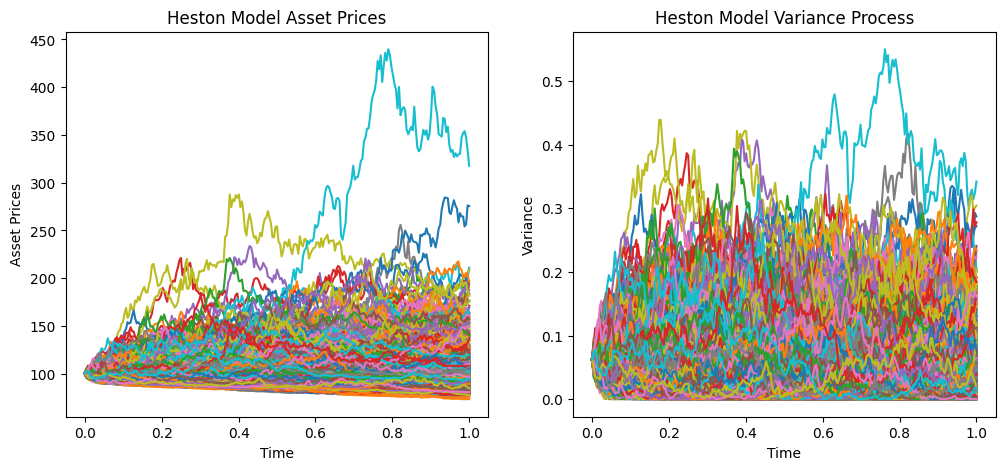

In [104]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,5))
time = np.linspace(0,T,N+1)
ax1.plot(time,S_p)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time')
ax1.set_ylabel('Asset Prices')

ax2.plot(time,v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')

plt.show()

In [88]:
gbm = S0*np.exp( (r - theta**2/2)*T + np.sqrt(theta)*np.sqrt(T)*np.random.normal(0,1,M) )

c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

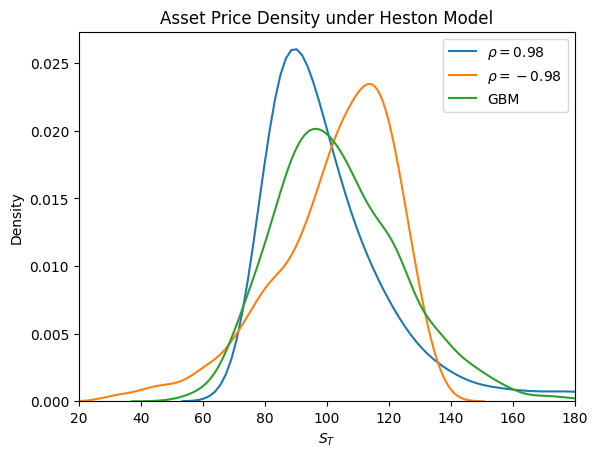

In [89]:


fig, ax = plt.subplots()

ax = sns.kdeplot(S_p[-1], label=r"$\rho= 0.98$", ax=ax)
ax = sns.kdeplot(S_n[-1], label=r"$\rho= -0.98$", ax=ax)
ax = sns.kdeplot(gbm, label="GBM", ax=ax)

plt.title(r'Asset Price Density under Heston Model')
plt.xlim([20, 180])
plt.xlabel('$S_T$')
plt.ylabel('Density')
plt.legend()
plt.show()



Text(0.5, 1.0, 'Correlated Random Variables')

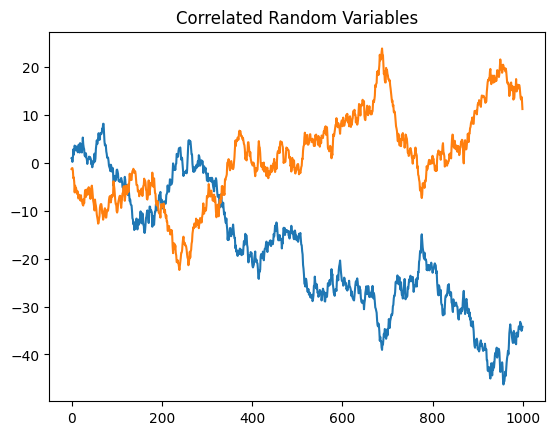

In [183]:

import numpy as np
import matplotlib.pyplot as plt

rho = -0.7
Ndraws = 1000
mu = np.array([0,0])
cov = np.array([[1, rho] , [rho , 1]])

W = np.random.multivariate_normal(mu, cov, size=Ndraws)

plt.plot(W.cumsum(axis=0));
plt.title('Correlated Random Variables')

In [184]:
print(np.corrcoef(W.T))

[[ 1.         -0.70718079]
 [-0.70718079  1.        ]]


In [185]:
def generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi, 
                          steps, Npaths, return_vol=False):
    dt = T/steps
    size = (Npaths, steps)
    prices = np.zeros(size)
    sigs = np.zeros(size)
    S_t = S
    v_t = v_0
    for t in range(steps):
        WT = np.random.multivariate_normal(np.array([0,0]), 
                                           cov = np.array([[1,rho],
                                                          [rho,1]]), 
                                           size=paths) * np.sqrt(dt) 
        
        S_t = S_t*(np.exp( (r- 0.5*v_t)*dt+ np.sqrt(v_t) *WT[:,0] ) ) 
        v_t = np.abs(v_t + kappa*(theta-v_t)*dt + xi*np.sqrt(v_t)*WT[:,1])
        prices[:, t] = S_t
        sigs[:, t] = v_t
    
    if return_vol:
        return prices, sigs
    
    return prices

c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\David\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

Text(0, 0.5, 'Density')

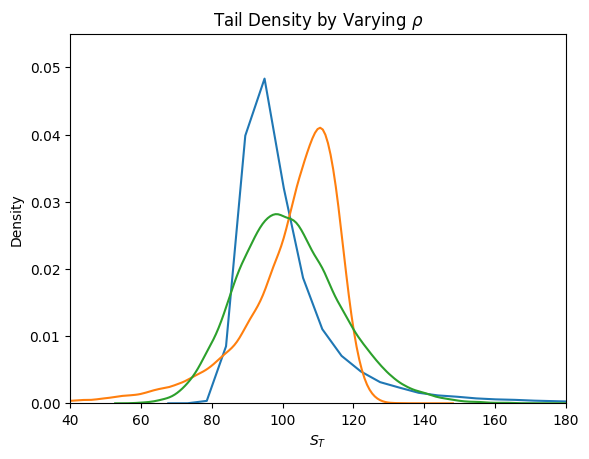

In [186]:
kappa =4
theta = 0.02
v_0 =  0.02
xi = 0.9
r = 0.02
S = 100
paths =50000
steps = 2000
T = 1

prices_pos = generate_heston_paths(S, T, r, kappa, theta,
                                    v_0, rho=0.9, xi=xi, steps=steps, Npaths=paths,
                                    return_vol=False)[:,-1]  
prices_neg  = generate_heston_paths(S, T, r, kappa, theta,
                                    v_0, rho=-0.9, xi=xi, steps=steps, Npaths=paths,
                                    return_vol=False)[:,-1]       
gbm_bench = S*np.exp( np.random.normal((r - v_0/2)*T , 
                                np.sqrt(theta)*np.sqrt(T), size=paths))

import seaborn as sns

fig, ax = plt.subplots()

ax = sns.kdeplot(data=prices_pos, label=r"$\rho = 0.9$", ax=ax)
ax = sns.kdeplot(data=prices_neg, label=r"$\rho= -0.9$ ", ax=ax)
ax = sns.kdeplot(data=gbm_bench, label="GBM", ax=ax)

ax.set_title(r'Tail Density by Varying $\rho$')
plt.axis([40, 180, 0, 0.055])
plt.xlabel('$S_T$')
plt.ylabel('Density')

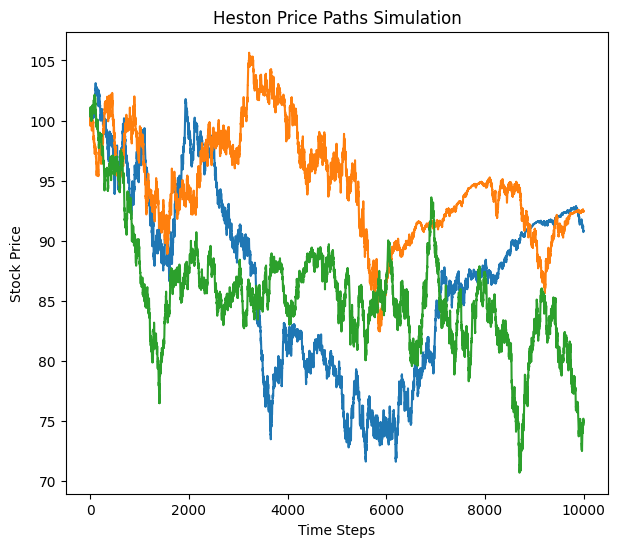

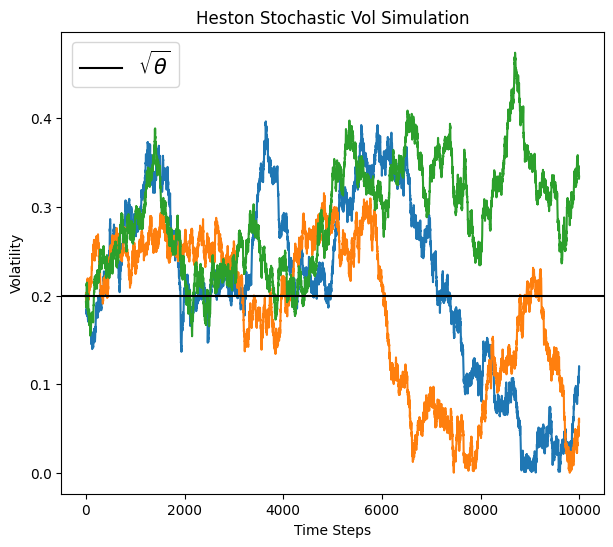

In [188]:
kappa =3
theta = 0.04
v_0 =  0.04
xi = 0.6
r = 0.05
S = 100
paths =3
steps = 10000
T = 1
rho = -0.8
prices,sigs = generate_heston_paths(S, T, r, kappa, theta,
                                    v_0, rho, xi, steps, paths,
                                    return_vol=True)        
    
plt.figure(figsize=(7,6))
plt.plot(prices.T)
plt.title('Heston Price Paths Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()

plt.figure(figsize=(7,6))
plt.plot(np.sqrt(sigs).T)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.legend(fontsize=15)
plt.show()